In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  r2_score, mean_squared_error, mean_absolute_percentage_error

In [2]:
bigmart__df = pd.read_csv('bigmart_train.csv')

In [3]:
bigmart__df.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [4]:
bigmart__df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
## % Missing Values
bigmart__df.isnull().mean()

Item_Identifier              0.000000
Item_Weight                  0.171653
Item_Fat_Content             0.000000
Item_Visibility              0.000000
Item_Type                    0.000000
Item_MRP                     0.000000
Outlet_Identifier            0.000000
Outlet_Establishment_Year    0.000000
Outlet_Size                  0.282764
Outlet_Location_Type         0.000000
Outlet_Type                  0.000000
Item_Outlet_Sales            0.000000
dtype: float64

In [6]:
bigmart__df[bigmart__df.Item_Weight.isnull()].iloc[0,:]

Item_Identifier                          FDP10
Item_Weight                                NaN
Item_Fat_Content                       Low Fat
Item_Visibility                        0.12747
Item_Type                          Snack Foods
Item_MRP                              107.7622
Outlet_Identifier                       OUT027
Outlet_Establishment_Year                 1985
Outlet_Size                             Medium
Outlet_Location_Type                    Tier 3
Outlet_Type                  Supermarket Type3
Item_Outlet_Sales                    4022.7636
Name: 7, dtype: object

In [7]:
bigmart__df[bigmart__df.Item_Identifier == 'FDP10']

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
7              FDP10          NaN          Low Fat         0.127470   
585            FDP10         19.0          Low Fat         0.128066   
2623           FDP10         19.0          Low Fat         0.128815   
3382           FDP10         19.0          Low Fat         0.128289   
4585           FDP10         19.0          Low Fat         0.128090   
6087           FDP10         19.0          Low Fat         0.128350   
7883           FDP10         19.0          Low Fat         0.127984   

        Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
7     Snack Foods  107.7622            OUT027                       1985   
585   Snack Foods  104.3622            OUT035                       2004   
2623  Snack Foods  107.6622            OUT017                       2007   
3382  Snack Foods  104.9622            OUT049                       1999   
4585  Snack Foods  107.0622            OUT046                       1997   
6087  Snack Foods  106.5622            OUT045                       2002   
7883  Snack Foods  107.6622            OUT013                       1987   

     Outlet_Size Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
7         Medium               Tier 3  Supermarket Type3          4022.7636  
585        Small               Tier 2  Supermarket Type1          1905.5196  
2623         NaN               Tier 2  Supermarket Type1          1164.4842  
3382      Medium               Tier 1  Supermarket Type1          1164.4842  
4585       Small               Tier 1  Supermarket Type1          1376.2086  
6087         NaN               Tier 2  Supermarket Type1          1482.0708  
7883        High               Tier 3  Supermarket Type1          1270.3464

In [8]:
bigmart__df[bigmart__df.Item_Identifier == 'FDP10'].Item_Weight.max()

19.0

In [9]:
# def find_weight(item_id):
#     return bigmart__df[bigmart__df.Item_Identifier == item_id].Item_Weight.max()

In [10]:
# temp_df = bigmart__df

In [11]:
#  temp_df[temp_df.Item_Weight.isnull()]

In [12]:
temp = bigmart__df[bigmart__df.Item_Identifier == 'FDP10']
temp[~temp.Item_Weight.isnull()]['Item_Weight'].iloc[0]

19.0

In [13]:
def item_weight_missing_imputation(col):
    item_id = col[0]
    item_w  = col[1]
    item_type = col[2]
    if pd.isnull(item_w):
        temp = bigmart__df[bigmart__df.Item_Identifier == item_id]
        try:
            return temp[~temp.Item_Weight.isnull()]['Item_Weight'].iloc[0]
        except:
            return bigmart__df[bigmart__df.Item_Type == item_type]['Item_Weight'].mean()
    else:
        return item_w

In [14]:
bigmart__df[['Item_Identifier', 'Item_Weight','Item_Type']]

Item_Identifier  Item_Weight              Item_Type
0              FDA15        9.300                  Dairy
1              DRC01        5.920            Soft Drinks
2              FDN15       17.500                   Meat
3              FDX07       19.200  Fruits and Vegetables
4              NCD19        8.930              Household
...              ...          ...                    ...
8518           FDF22        6.865            Snack Foods
8519           FDS36        8.380           Baking Goods
8520           NCJ29       10.600     Health and Hygiene
8521           FDN46        7.210            Snack Foods
8522           DRG01       14.800            Soft Drinks

[8523 rows x 3 columns]

In [15]:
bigmart__df[['Item_Identifier', 'Item_Weight','Item_Type']].apply(item_weight_missing_imputation)

Item_Identifier          DRC01
Item_Weight               5.92
Item_Type          Soft Drinks
dtype: object

In [16]:
bigmart__df[['Item_Identifier', 'Item_Weight','Item_Type']].apply(item_weight_missing_imputation, axis=1)

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Length: 8523, dtype: float64

In [17]:
bigmart__df_v2 = bigmart__df.copy()

In [18]:
bigmart__df_v2.loc[:,'Item_Weight'] = bigmart__df[['Item_Identifier', 'Item_Weight','Item_Type']].apply(item_weight_missing_imputation, axis=1)

In [19]:
bigmart__df_v2.isnull().mean()

Item_Identifier              0.000000
Item_Weight                  0.000000
Item_Fat_Content             0.000000
Item_Visibility              0.000000
Item_Type                    0.000000
Item_MRP                     0.000000
Outlet_Identifier            0.000000
Outlet_Establishment_Year    0.000000
Outlet_Size                  0.282764
Outlet_Location_Type         0.000000
Outlet_Type                  0.000000
Item_Outlet_Sales            0.000000
dtype: float64

In [20]:
#if categorical value is missing , replace it with mode

In [21]:
bigmart__df_v3 = bigmart__df_v2.copy()

In [22]:
bigmart__df_v3.Outlet_Size.mode()

0    Medium
Name: Outlet_Size, dtype: object

In [23]:
bigmart__df_v3.fillna({'Outlet_Size':bigmart__df_v3.Outlet_Size.mode()[0]}, inplace= True)

In [24]:
bigmart__df_v3.isnull().mean()

Item_Identifier              0.0
Item_Weight                  0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_Type                    0.0
Item_MRP                     0.0
Outlet_Identifier            0.0
Outlet_Establishment_Year    0.0
Outlet_Size                  0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
Item_Outlet_Sales            0.0
dtype: float64

# Sanity check

In [25]:
bigmart__df_v3.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [26]:
bigmart__df_v3.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [27]:
bigmart__df_v3.Outlet_Establishment_Year.unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [28]:
bigmart__df_v3.Outlet_Location_Type.unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [29]:
bigmart__df_v3.Outlet_Size.unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [30]:
bigmart__df_v3.Outlet_Type.unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [31]:
# rectify Item_Fat_Content unique values

In [32]:
bigmart__df_v4 = bigmart__df_v3.copy()

In [33]:
bigmart__df_v4.Item_Fat_Content.replace(['LF', 'low fat'], 'Low Fat', inplace=True)
bigmart__df_v4.Item_Fat_Content.replace('reg', 'Regular', inplace=True)

In [34]:
bigmart__df_v4.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

# Outliers

<AxesSubplot:>

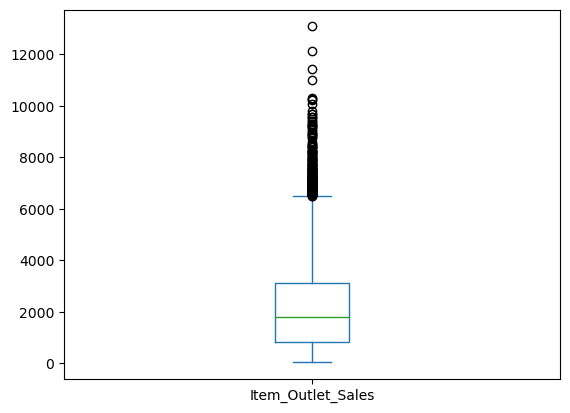

In [35]:
bigmart__df_v4.Item_Outlet_Sales.plot(kind='box')

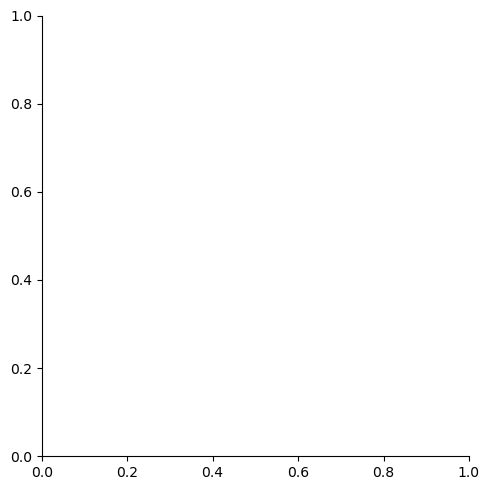

In [36]:
sns.displot(a=bigmart__df_v4.Item_Outlet_Sales)

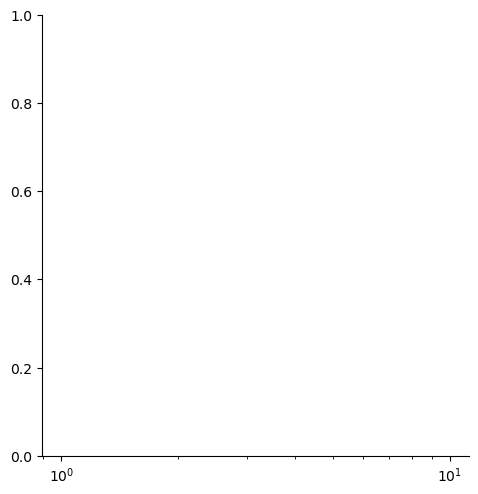

In [37]:
sns.displot(a=bigmart__df_v4.Item_Outlet_Sales)
plt.xscale('log')

In [38]:
 # IQR treatmennt

In [39]:
Q1 = np.percentile(bigmart__df_v4.Item_Outlet_Sales,25)
Q3 = np.percentile(bigmart__df_v4.Item_Outlet_Sales,75)
IQR = Q3-Q1

In [40]:
upper = Q3 + 1.5*IQR

In [41]:
bigmart__df_v4[bigmart__df_v4.Item_Outlet_Sales > upper].shape[0]/bigmart__df_v4.shape[0]

0.021823301654347062

In [42]:
bigmart__df_v4[bigmart__df_v4.Item_Outlet_Sales > upper]

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
43             FDC02        21.35          Low Fat         0.069103   
130            FDY25        12.00          Low Fat         0.033810   
132            NCR53        12.15          Low Fat         0.144338   
145            FDP16        18.60          Low Fat         0.039356   
203            FDI24        10.30          Low Fat         0.078362   
...              ...          ...              ...              ...   
8245           FDU55        16.20          Low Fat         0.035967   
8329           NCQ06        13.00          Low Fat         0.041622   
8350           NCE18        10.00          Low Fat         0.021421   
8447           FDS26        20.35          Low Fat         0.089975   
8510           FDN58        13.80          Regular         0.056862   

                  Item_Type  Item_MRP Outlet_Identifier  \
43                   Canned  259.9278            OUT018   
130                  Canned  180.5976            OUT027   
132      Health and Hygiene  224.4404            OUT027   
145            Frozen Foods  246.3802            OUT049   
203            Baking Goods  177.9370            OUT027   
...                     ...       ...               ...   
8245  Fruits and Vegetables  260.3278            OUT049   
8329              Household  253.6014            OUT027   
8350              Household  248.3750            OUT035   
8447                  Dairy  261.6594            OUT017   
8510            Snack Foods  231.5984            OUT035   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
43                         2009      Medium               Tier 3   
130                        1985      Medium               Tier 3   
132                        1985      Medium               Tier 3   
145                        1999      Medium               Tier 1   
203                        1985      Medium               Tier 3   
...                         ...         ...                  ...   
8245                       1999      Medium               Tier 1   
8329                       1985      Medium               Tier 3   
8350                       2004       Small               Tier 2   
8447                       2007      Medium               Tier 2   
8510                       2004       Small               Tier 2   

            Outlet_Type  Item_Outlet_Sales  
43    Supermarket Type2          6768.5228  
130   Supermarket Type3          7968.2944  
132   Supermarket Type3          6976.2524  
145   Supermarket Type1          7370.4060  
203   Supermarket Type3          6704.6060  
...                 ...                ...  
8245  Supermarket Type1          7549.5062  
8329  Supermarket Type3          6630.0364  
8350  Supermarket Type1          7240.5750  
8447  Supermarket Type1          7588.1226  
8510  Supermarket Type1          7182.6504  

[186 rows x 12 columns]

<AxesSubplot:ylabel='Density'>

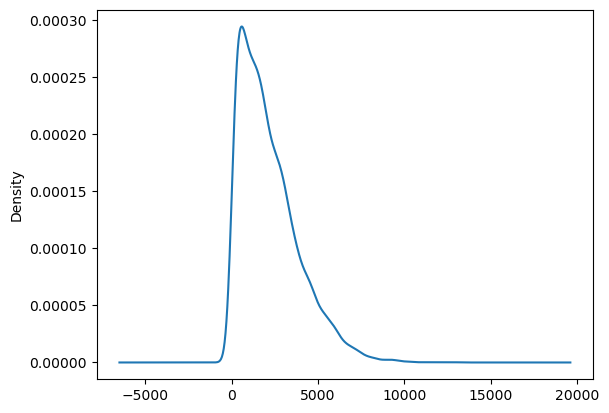

In [43]:
bigmart__df_v4.Item_Outlet_Sales.plot(kind='kde')

# After  log transformation

In [44]:
Q1 = np.percentile(np.log(bigmart__df_v4.Item_Outlet_Sales),25)
Q3 = np.percentile(np.log(bigmart__df_v4.Item_Outlet_Sales),75)
IQR = Q3-Q1

In [45]:
upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

In [46]:
bigmart__df_v4[np.log(bigmart__df_v4.Item_Outlet_Sales) < lower].shape[0]/bigmart__df_v4.shape[0]

0.020415346708905314

In [47]:
bigmart__df_v4[np.log(bigmart__df_v4.Item_Outlet_Sales) > upper].shape[0]/bigmart__df_v4.shape[0]

0.0

<AxesSubplot:ylabel='Density'>

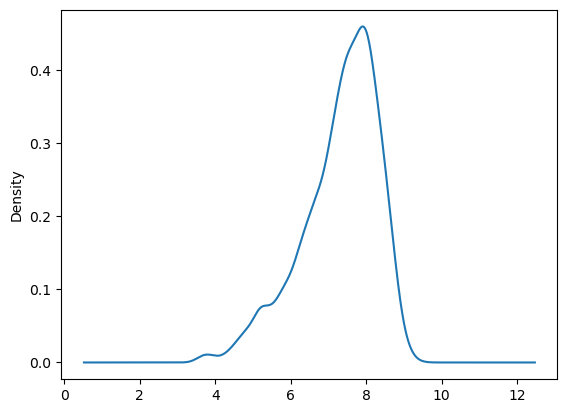

In [48]:
np.log(bigmart__df_v4.Item_Outlet_Sales).plot(kind='kde')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Outlet_Sales'>

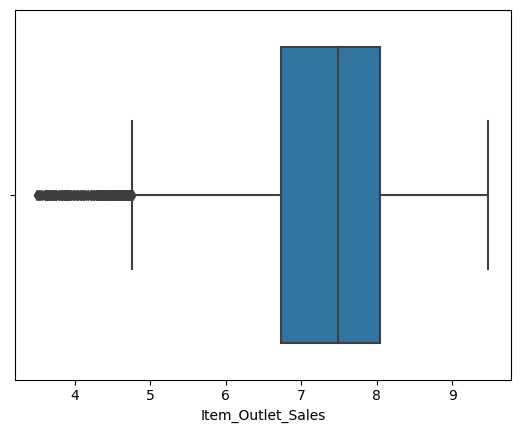

In [49]:
sns.boxplot(np.log(bigmart__df_v4.Item_Outlet_Sales))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Outlet_Sales'>

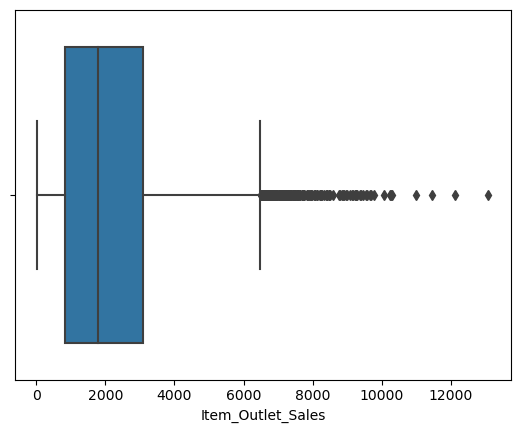

In [50]:
sns.boxplot(bigmart__df_v4.Item_Outlet_Sales)

In [51]:
upper

10.00914421762982

In [52]:
bigmart__df_v5 = bigmart__df_v4[bigmart__df_v4.Item_Outlet_Sales <  upper]

# TODO:  visibility ---check ooutliers and Treat them

In [53]:
bigmart__df_v5

Empty DataFrame
Columns: [Item_Identifier, Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type, Item_Outlet_Sales]
Index: []

In [54]:
bigmart__df_v5['Outlet_Age'] = 2023 - bigmart__df_v5.Outlet_Establishment_Year

In [55]:
bigmart__df_v5

Empty DataFrame
Columns: [Item_Identifier, Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type, Item_Outlet_Sales, Outlet_Age]
Index: []

In [56]:
# Drop Irrelevant columns

In [57]:
bigmart__df_v5.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Outlet_Age'],
      dtype='object')

In [58]:
cols_to_drop = ['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year']

In [59]:
bigmart__df_v6 = bigmart__df_v5.drop(cols_to_drop, axis=1)

In [60]:
bigmart__df_v6.head()

Empty DataFrame
Columns: [Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Size, Outlet_Location_Type, Outlet_Type, Item_Outlet_Sales, Outlet_Age]
Index: []

# Encoding Categorical Columns

In [69]:
X = bigmart__df_v6.drop('Item_Outlet_Sales',axis=1)
y = bigmart__df_v6['Item_Outlet_Sales']

In [70]:
X_dummies = pd.get_dummies(X)

In [71]:
X_dummies

Empty DataFrame
Columns: [Item_Weight, Item_Visibility, Item_MRP, Outlet_Age]
Index: []

# Implementing statsmodels OLS

In [64]:
import statsmodels.api as sm

In [67]:
X_ = sm.add_constant(X_dummies)
model = sm.OLS(y,X_)
result  = model.fit()

ValueError: zero-size array to reduction operation maximum which has no identity

In [68]:
result.summary()

NameError: name 'result' is not defined